In [1]:
import pandas as pd

In [2]:
factories = pd.read_csv("data/6章/tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北
FC00006,山形工場,30,東北
FC00007,那須工場,25,東北
FC00008,青森工場,16,東北


In [3]:
warehouse = pd.read_csv("data/6章/tbl_warehouse.csv", index_col=0)
warehouse

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北
WH00006,山形倉庫,65,東北


In [4]:
cost = pd.read_csv("data/6章/rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [5]:
trans = pd.read_csv("data/6章/tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [6]:
join_data = pd.merge(trans, cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [7]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [8]:
join_data = pd.merge(join_data, warehouse, left_on="FromWH", right_on="WHID", how="left")
join_data= join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [9]:
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [10]:
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


In [11]:
print("関東支社のコスト: " + str(kanto["Cost"].sum()) + "万円")
print("東北支社のコスト: " + str(tohoku["Cost"].sum()) + "万円")

関東支社のコスト: 2189.3万円
東北支社のコスト: 2062.0万円


In [12]:
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum()) * 10000
print("関東支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")

関東支社の部品1つ当たりの輸送コスト: 445円


In [13]:
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum()) * 10000
print("東北支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")

東北支社の部品1つ当たりの輸送コスト: 410円


In [15]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("東京支社の平均: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

東京支社の平均: 1.075万円
東北支社の平均: 1.05万円


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


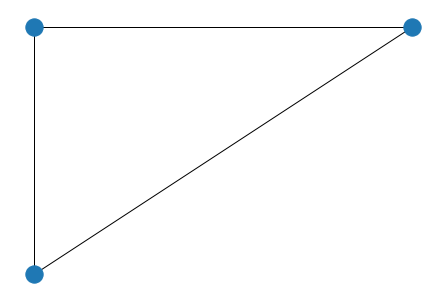

In [17]:
G=nx.Graph()

G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

nx.draw(G, pos)
plt.show()

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


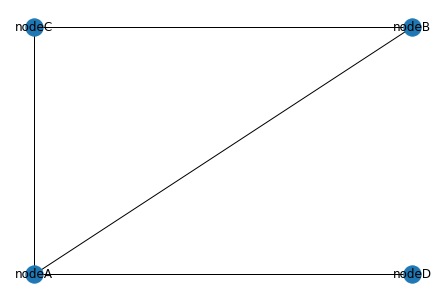

In [18]:
G.add_node("nodeD")
G.add_edge("nodeA", "nodeD")
pos["nodeD"]=(1,0)
nx.draw(G, pos, with_labels=True)

In [4]:
import numpy as np

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


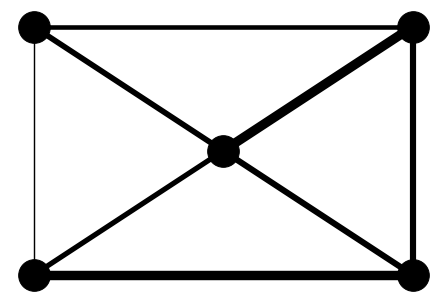

In [20]:
df_w = pd.read_csv("data/6章/network_weight.csv")
df_p = pd.read_csv("data/6章/network_pos.csv")

size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
G = nx.Graph()

for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])
        
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
nx.draw(G, pos, with_lables=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()

In [5]:
df_tr = pd.read_csv("data/6章/trans_route.csv", index_col="工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [6]:
df_pos = pd.read_csv('data/6章/trans_route_pos.csv')

In [7]:
G = nx.Graph()

/usr/local/var/pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


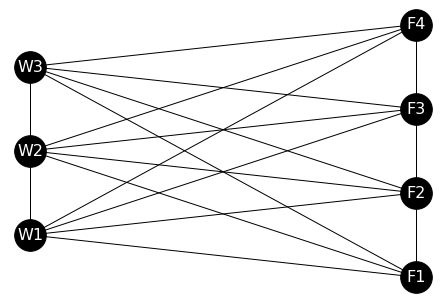

In [8]:
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])
    
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j):
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif (df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)
                
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
    
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', witdh=edge_weights)

plt.show()

In [9]:
df_tr = pd.read_csv("data/6章/trans_route.csv", index_col="工場")
df_tc = pd.read_csv("data/6章/trans_cost.csv", index_col="工場")

In [15]:
def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("総輸送コスト:" + str(trans_cost(df_tr, df_tc)))

総輸送コスト:1493


In [16]:
df_demand = pd.read_csv('data/6章/demand.csv')
df_supply = pd.read_csv('data/6章/supply.csv')

In [24]:
df_demand
# df_demand.iloc[0][1]

,F1,F2,F3,F4
0,28,29,31,25


In [19]:
df_supply

,W1,W2,W3
0,35,41,42


In [27]:
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i]) + "への輸送量:" + str(temp_sum) + " (需要量:" + str(df_demand.iloc[0][i]) + ")")
    if temp_sum >= df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("需要量を満たしていません。輸送ルートを再計算してください。")
        
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i]) + "からの輸送量:" + str(temp_sum) + "(供給限界:" + str(df_supply.iloc[0][i]) + ")")
    if temp_sum <= df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("供給限界を超過しています。輸送ルートを再計算してください。")

F1への輸送量:30 (需要量:28)
需要量を満たしています。
F2への輸送量:30 (需要量:29)
需要量を満たしています。
F3への輸送量:32 (需要量:31)
需要量を満たしています。
F4への輸送量:25 (需要量:25)
需要量を満たしています。
W1からの輸送量:35(供給限界:35)
供給限界の範囲内です。
W2からの輸送量:40(供給限界:41)
供給限界の範囲内です。
W3からの輸送量:42(供給限界:42)
供給限界の範囲内です。


In [29]:
import numpy as np

In [32]:
df_tr_new = pd.read_csv('data/6章/trans_route_new.csv', index_col='工場')
print(df_tr_new)

print("総輸送向スト（変更後）:" + str(trans_cost(df_tr_new, df_tc)))

def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i] = 1
    return flag

print("需要条件計算結果:" + str(condition_demand(df_tr_new, df_demand)))
print("供給条件計算結果:" + str(condition_supply(df_tr_new, df_supply)))

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
総輸送向スト（変更後）:1428
需要条件計算結果:[1. 1. 1. 1.]
供給条件計算結果:[1. 0. 1.]
